In [178]:
import time
import skimage.io as io
import skimage.color as color
import skimage.exposure as exposure
import skimage.filters as filters
from skimage.segmentation import quickshift
import skimage.transform as transform
from skimage.filters import rank
from skimage.morphology import disk
from skimage.transform import pyramid_gaussian

import matplotlib
import matplotlib.pyplot as plt

from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops

%matplotlib inline

In [3]:
def plot_im_hist(image):
    f, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].imshow(image[:,:,0], cmap='gray')
    ax[1].hist(image[:, :, 0].ravel(), bins=256)
    plt.show()

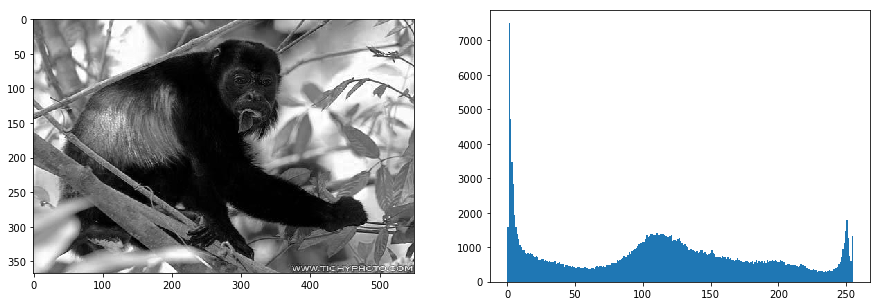

In [79]:
image1 = io.imread('training/n0/n0018.jpg')
plot_im_hist(image1)

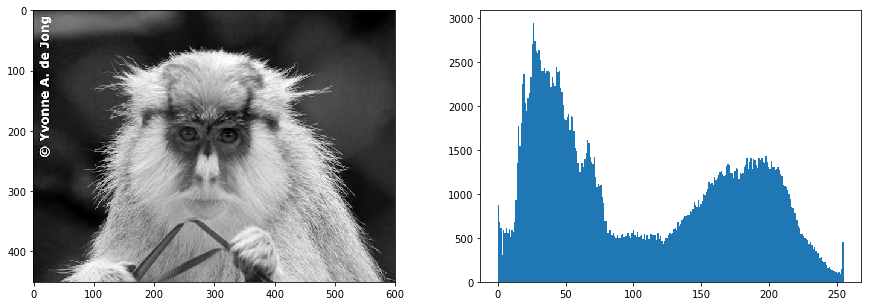

In [80]:
image2 = io.imread('training/n1/n1018.jpg')
plot_im_hist(image2)

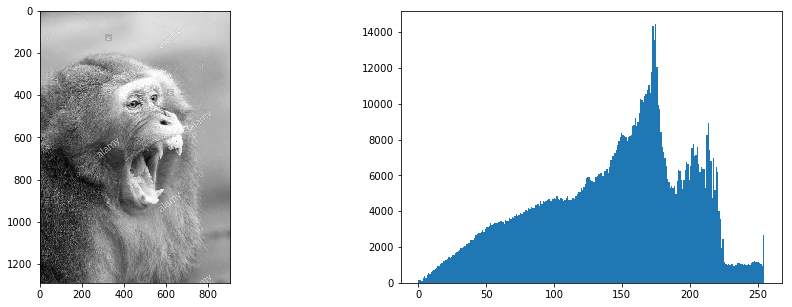

In [81]:
image3 = io.imread('training/n3/n3020.jpg')
plot_im_hist(image3)

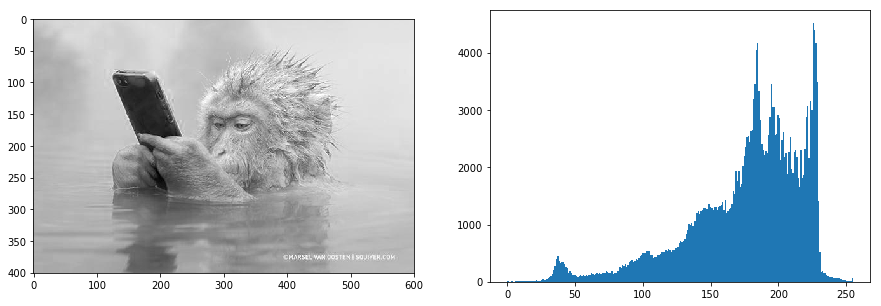

In [82]:
image4 = io.imread('training/n3/n3021.jpg')
plot_im_hist(image4)

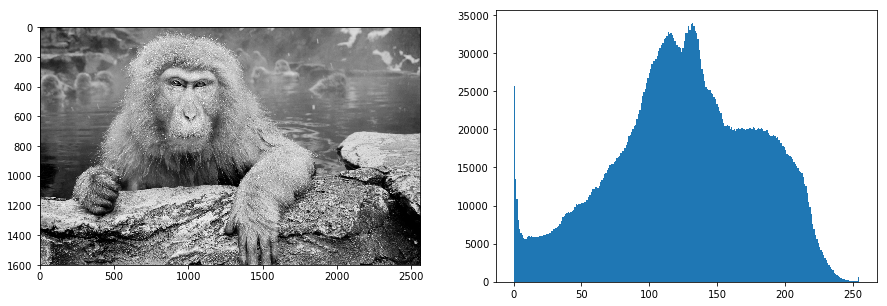

In [83]:
image5 = io.imread('training/n3/n3022.jpg')
plot_im_hist(image5)

In [93]:
start = time.time()
home_quickshift = quickshift(image1)
print("quickshift took %.2f seconds" % (time.time() - start))
io.imshow(home_quickshift)

quickshift took 31.18 seconds


C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


quickshift took 32.50 seconds


C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


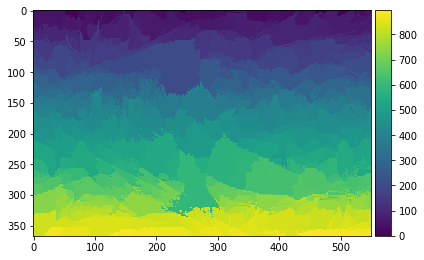

In [95]:
start = time.time()
home_quickshift = quickshift(exposure.equalize_adapthist(image1, kernel_size=10))
print("quickshift took %.2f seconds" % (time.time() - start))
io.imshow(home_quickshift)

quickshift took 42.24 seconds


C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


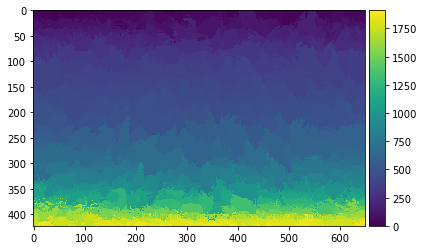

In [96]:
start = time.time()
home_quickshift = quickshift(image2)
print("quickshift took %.2f seconds" % (time.time() - start))
io.imshow(home_quickshift)

Show different sizes of disk

In [12]:
def plot_entropy(image):
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(15, 5))

    img0 = ax0.imshow(image, cmap=plt.cm.gray)
    ax0.set_title('Image')
    ax0.axis('off')
    fig.colorbar(img0, ax=ax0)

    img1 = ax1.imshow(rank.entropy(image[:,:, 0], disk(2)), cmap=plt.cm.jet)
    img2 = ax2.imshow(rank.entropy(image[:,:, 0], disk(5)), cmap=plt.cm.jet)
    img3 = ax3.imshow(rank.entropy(image[:,:, 0], disk(10)), cmap=plt.cm.jet)
    ax1.set_title('Entropy Disk 2')
    ax2.set_title('Entropy Disk 5')
    ax3.set_title('Entropy Disk 10')
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')

    fig.colorbar(img1, ax=ax1)
    fig.colorbar(img2, ax=ax2)
    fig.colorbar(img3, ax=ax3)

    plt.show()

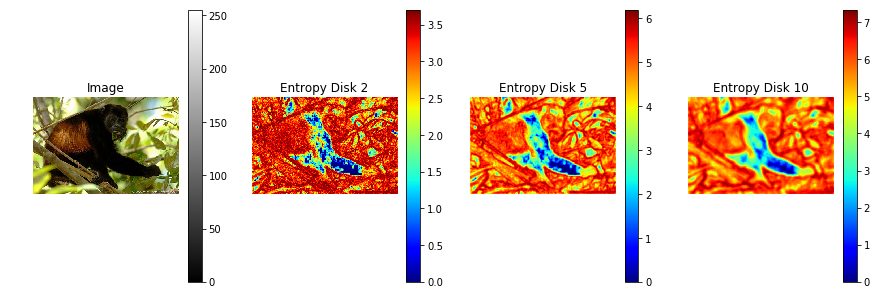

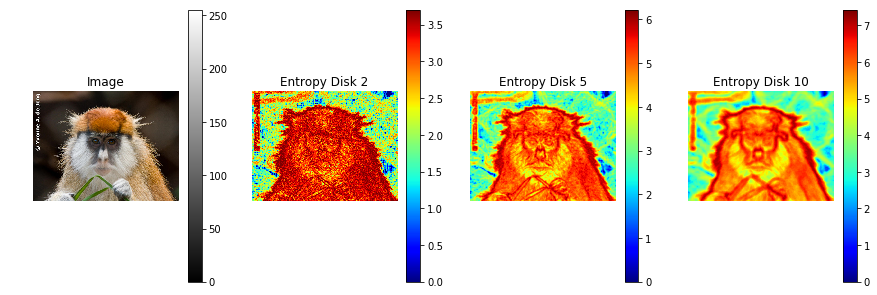

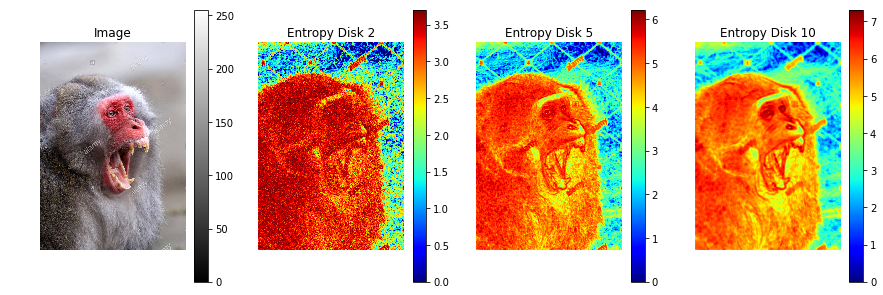

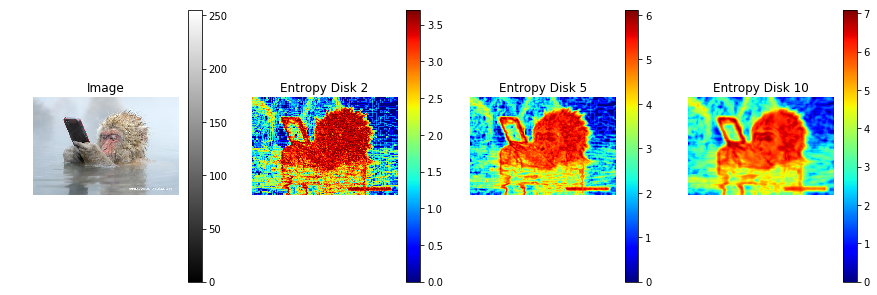

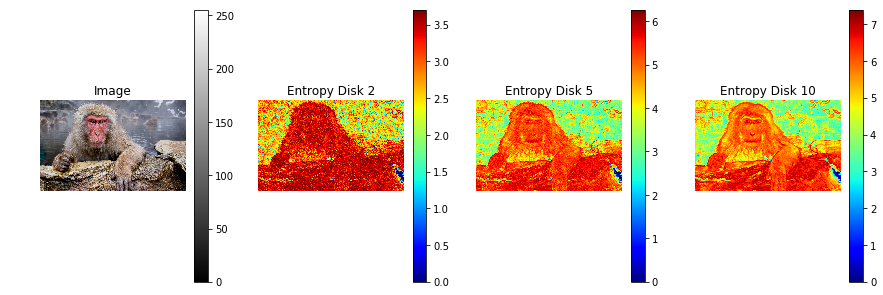

In [175]:
for i in [image1, image2, image3, image4, image5]:
    plot_entropy(i)

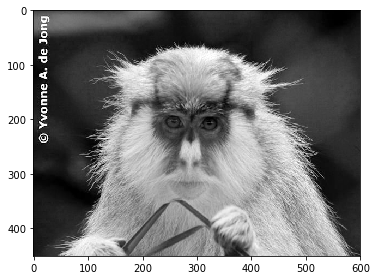

In [208]:
io.imshow(image2[:,:,0])

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


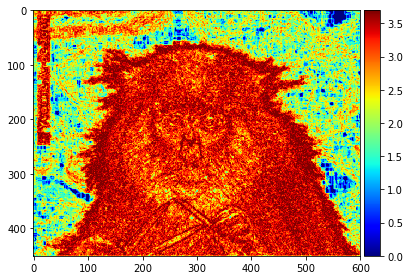

In [209]:
img2 = entropy(image2[:,:, 0], disk(2))
io.imshow(img2, cmap=plt.cm.jet)

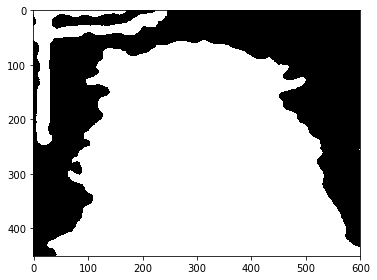

In [210]:
img2_bin = filters.gaussian(img2) > threshold_otsu(filters.gaussian(img2))

io.imshow(rank.median(img2_bin, selem=disk(10)))

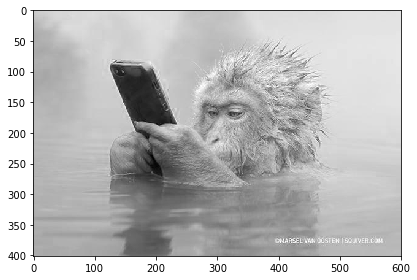

In [189]:
io.imshow(image4[:,:,0])

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


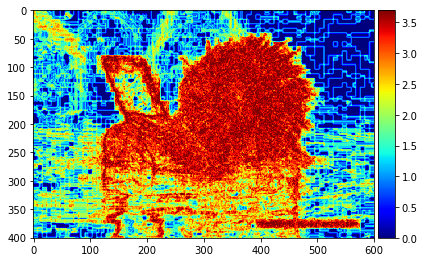

In [190]:
img4 = entropy(image4[:,:, 0], disk(2))
io.imshow(img4, cmap=plt.cm.jet)

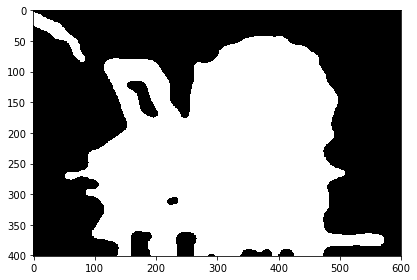

In [195]:
img4_bin = filters.gaussian(img4, sigma=5) > threshold_otsu(filters.gaussian(img4, sigma=5))

io.imshow(rank.median(img4_bin, selem=disk(10)))
# io.imshow(img4_bin)

In [200]:
from skimage.filters import rank

def plot_mean(image):
    m1 = rank.mean(image[:, :, 0], selem=disk(2))
    m2 = rank.mean(image[:, :, 0], selem=disk(5))
    m3 = rank.mean(image[:, :, 0], selem=disk(15))

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                             sharex=True, sharey=True)
    ax = axes.ravel()

    titles = ['Original', 'Mean Disk 2', 'Mean Disk 5', 'Mean Disk 15']
    imgs = [image, m1, m2, m3]
    for n in range(0, len(imgs)):
        ax[n].imshow(imgs[n], cmap=plt.cm.jet)
#         fig.colorbar(image, ax=ax[n])
        ax[n].set_title(titles[n])
        ax[n].axis('off')

In [205]:
from skimage.filters import rank

def plot_median(image):
    m1 = rank.median(image[:, :, 0], selem=disk(2))
    m2 = rank.median(image[:, :, 0], selem=disk(5))
    m3 = rank.median(image[:, :, 0], selem=disk(15))

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                             sharex=True, sharey=True)
    ax = axes.ravel()

    titles = ['Original', 'Med Disk 2', 'Med Disk 5', 'Med Disk 15']
    imgs = [image, m1, m2, m3]
    for n in range(0, len(imgs)):
        ax[n].imshow(imgs[n], cmap=plt.cm.jet)
#         fig.colorbar(image, ax=ax[n])
        ax[n].set_title(titles[n])
        ax[n].axis('off')

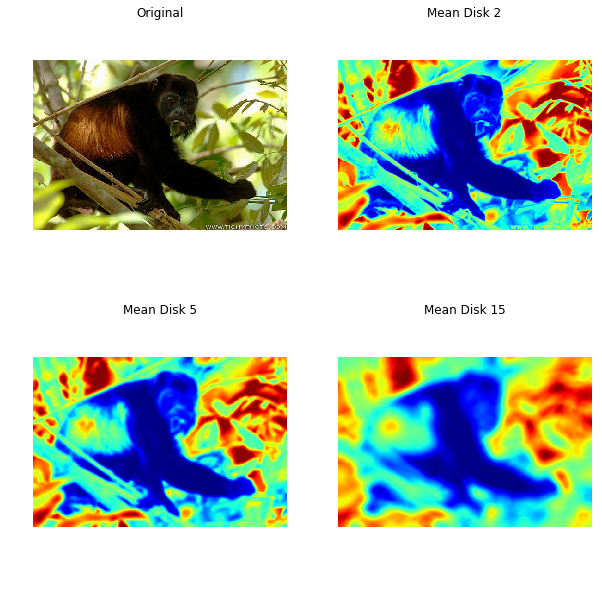

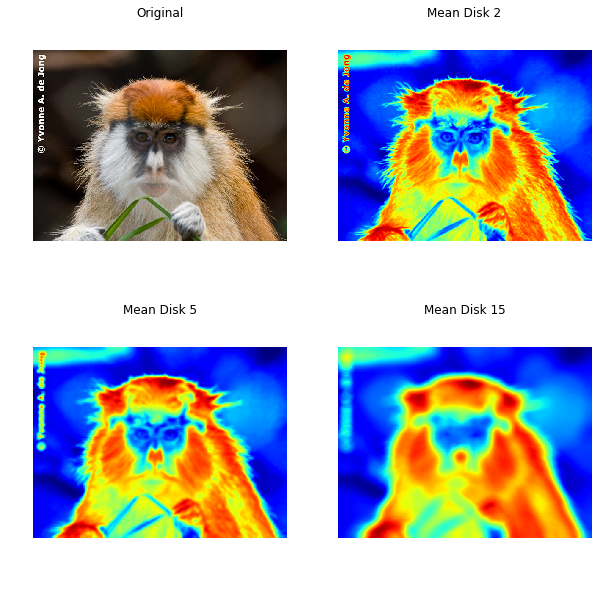

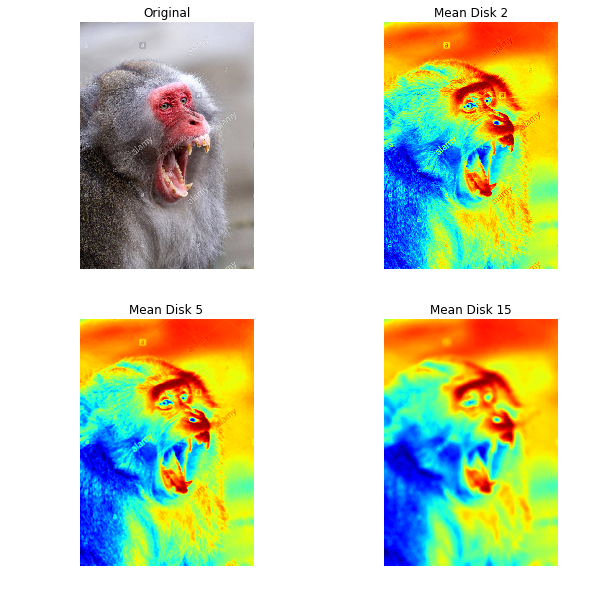

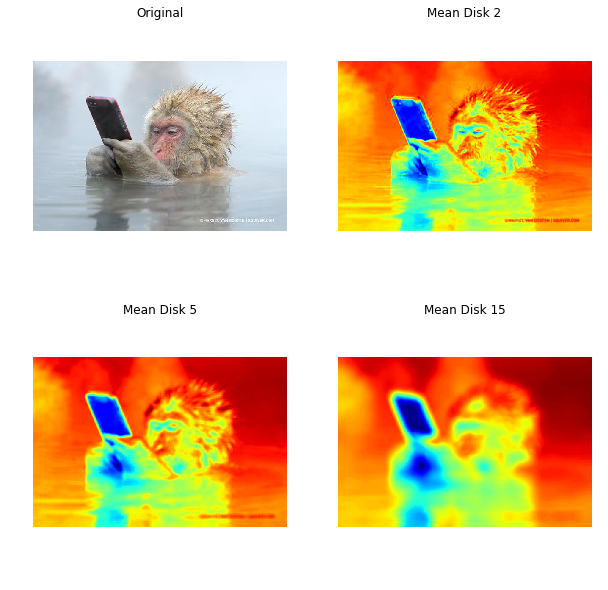

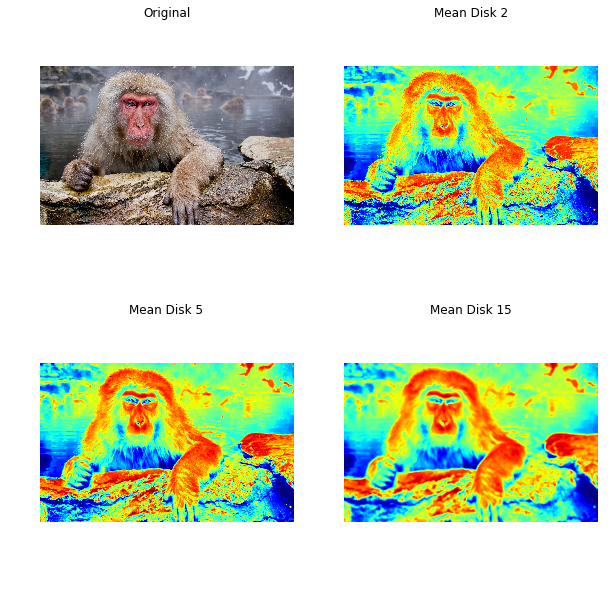

In [203]:
for i in [image1, image2, image3, image4, image5]:
    plot_mean(i)

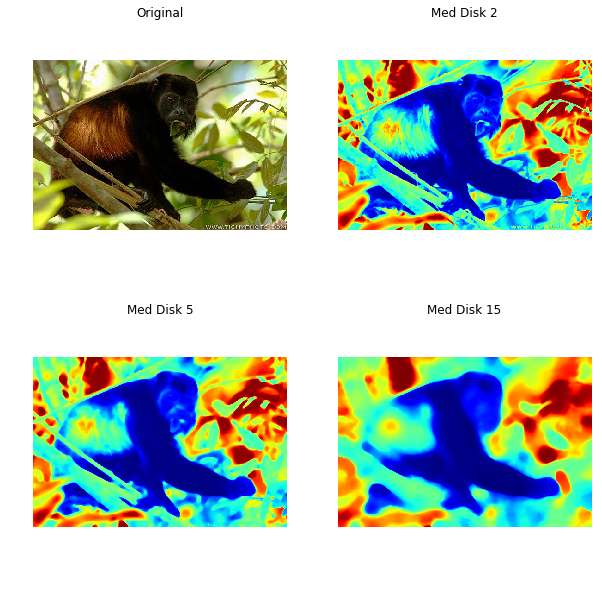

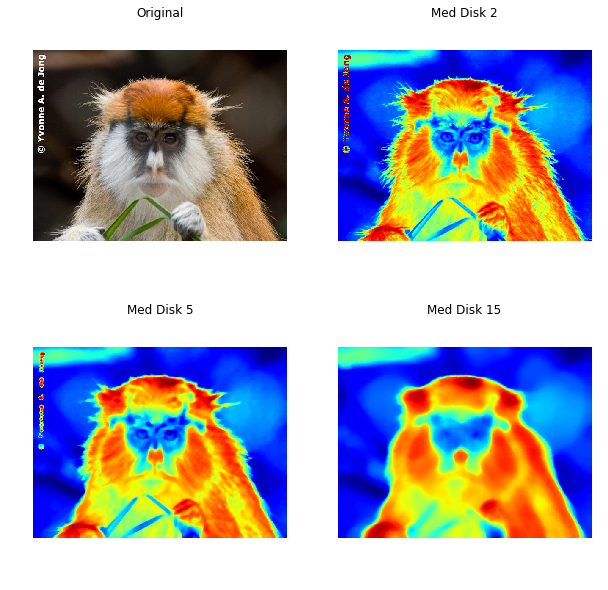

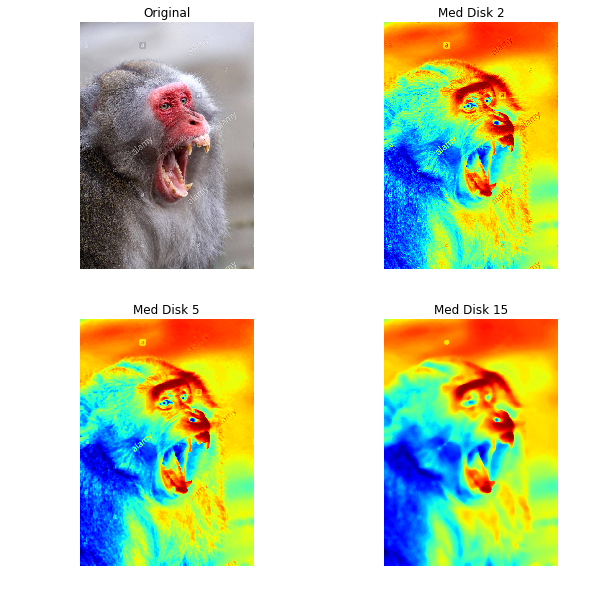

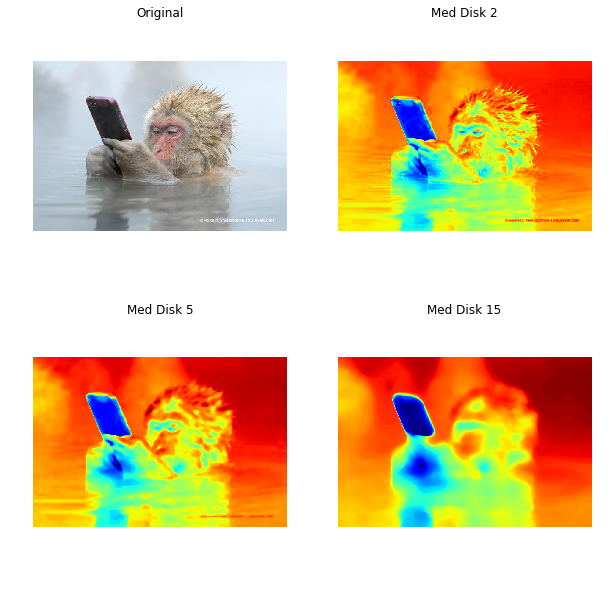

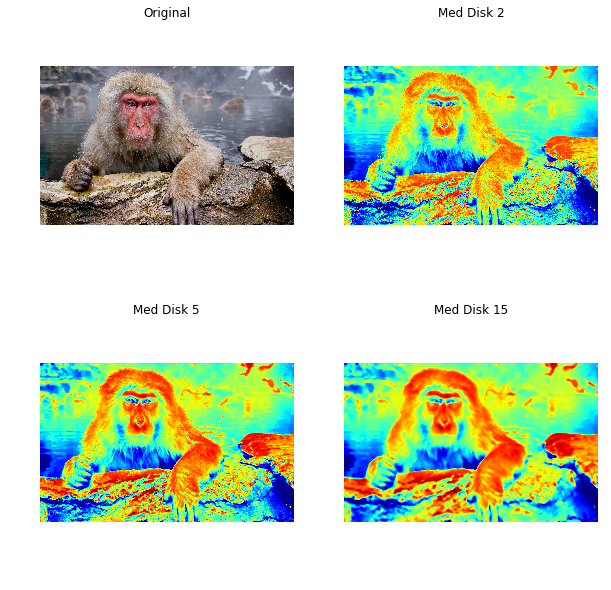

In [206]:
for i in [image1, image2, image3, image4, image5]:
    plot_median(i)

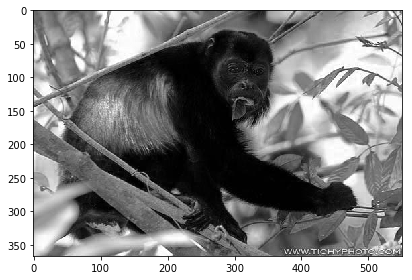

In [124]:
io.imshow(image1[:,:,0])

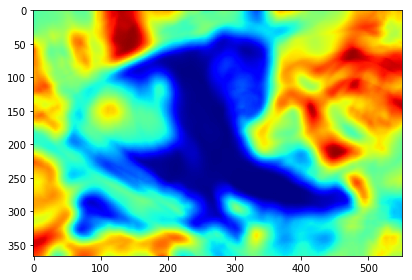

In [160]:
img1 = rank.mean(image1[:, :, 0], selem=disk(15))
io.imshow(img1, cmap=plt.cm.jet)

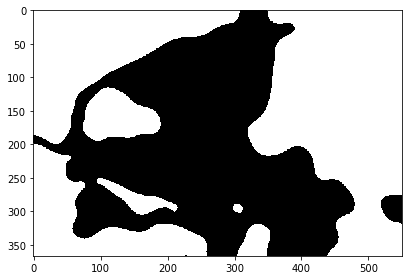

In [162]:
img1_bin = img1 > threshold_otsu(img1)

io.imshow(rank.median(img1_bin, selem=disk(10)), cmap='gray')

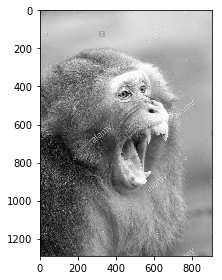

In [157]:
io.imshow(image3[:,:,0])

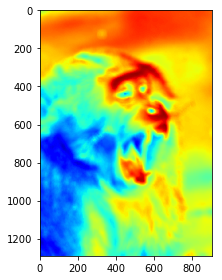

In [158]:
img3 = rank.mean(image3[:, :, 0], selem=disk(15))
io.imshow(img3, cmap=plt.cm.jet)

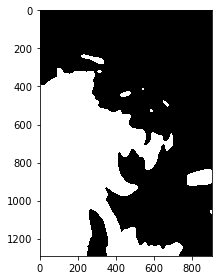

In [159]:
img3_bin = img3 < threshold_otsu(img3)

io.imshow(rank.median(img3_bin, selem=disk(10)), cmap='gray')

(367, 550)


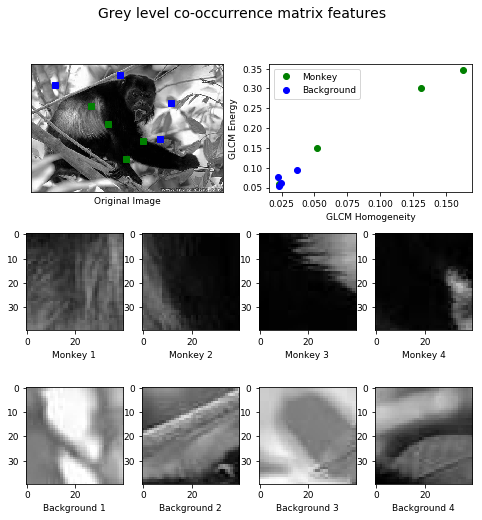

In [343]:
PATCH_SIZE = 40

image = image1[:,:,0]
print(image.shape)
# open the camera image

# select some patches from grassy areas of the image
grass_locations = [(100,150), (150,200), (200,300), (250,250)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(40, 48), (10, 233), (90, 380), (195, 350)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
zs = []
qs = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    zs.append(greycoprops(glcm, 'homogeneity')[0, 0])
    qs.append(greycoprops(glcm, 'energy')[0, 0])
    
# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest',
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(qs[:len(grass_patches)], zs[:len(grass_patches)], 'go', label='Monkey')
ax.plot(qs[len(grass_patches):], zs[len(grass_patches):], 'bo', label='Background')
ax.set_xlabel('GLCM Homogeneity')
ax.set_ylabel('GLCM Energy')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel(f"Monkey {i+1}")

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel(f"Background {i+1}")


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14)
plt.show()

In [211]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [217]:
def glcm_sliding_window(image, s):
    sw = sliding_window(image[:,:,0], 1, (s, s))
    energy = []
    homogeneity = []
    contrast = []
    dissimilarity = []
    correlation = []

    x = []
    y = []

    for i in sw:
        x.append(i[0])
        y.append(i[1])
        glcm = greycomatrix(i[2], [5], [0], 256, symmetric=True, normed=True)
        energy.append(greycoprops(glcm, 'energy')[0, 0])
        homogeneity.append(greycoprops(glcm, 'homogeneity')[0, 0])
        contrast.append(greycoprops(glcm, 'contrast')[0, 0])
        dissimilarity.append(greycoprops(glcm, 'dissimilarity')[0, 0])
        correlation.append(greycoprops(glcm, 'correlation')[0, 0])
    return {'energy': energy,'homogeneity': homogeneity, 'contrast': contrast,
            'dissimilarity': dissimilarity, 'correlation': correlation}


In [218]:
x = glcm_sliding_window(image1, 30)

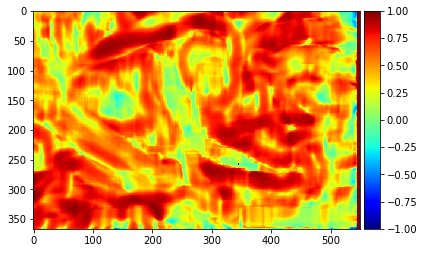

In [219]:
io.imshow(np.array(x['correlation']).reshape(image1[:,:,0].shape), cmap=plt.cm.jet)

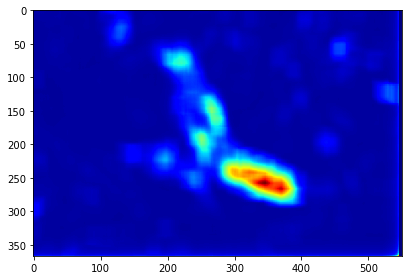

In [220]:
io.imshow(np.array(x['energy']).reshape(image1[:,:,0].shape), cmap=plt.cm.jet)

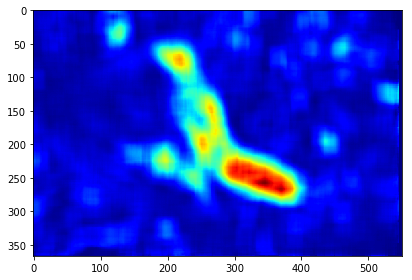

In [221]:
io.imshow(np.array(x['homogeneity']).reshape(image1[:,:,0].shape), cmap=plt.cm.jet)